<a href="https://colab.research.google.com/github/Himakar098/CITS5508_ML/blob/main/simple_learning_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center>CITS5508 Lab sheet 1: Implementing a simple learning model</center>

This is an example notebook to support you in implementing the simple learning model discussed in the lectures.

We have provided some ideas and functions to help you. Use the slide content and your thinking to create the several necessary steps. Your tasks are:

- Generate a linearly separable dataset (you can use the function [`make_classification`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html))
- Plot the dataset using the provided code below.
- Use the dataset to apply the simple model on it.
- Show that it converges for this linearly separable dataset by plotting the decision boundary for the final values of the weights and the bias.
- (Optional) Include in the previous plot the decision boundaries for some intermediate steps of the algorithm (that is, non-final values of the weights and bias) to show the algorithm is converging.

### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# to display plots in Jupyter notebook
%matplotlib inline

#We will do some 3D plotting
from mpl_toolkits.mplot3d import Axes3D

### Functions and Classes

We usually let the functions and classes defined in the upper part of the code to facilitate code reading and execution.

Defining the *Simple_Model* class is one way to implement the model, but several ways exist. You can choose to follow this code or create your own.

In [10]:
#We are defining the class of our model
class Simple_Model:
    def __init__(self, num_features, num_iterations=1000):
        self.num_iterations = num_iterations
        #...  # init the weights, don't forget the weight for bias
        self.weights = np.zeros(num_features + 1)

    def apply_threshold(self, x):
        # apply the decision rule here
        # ...
        return 1 if x >= 0 else -1


    def predict(self, x):
        # the predict function add the bias term, do the weighted sum and call the decision rule (apply_threshold)
        #...
        #...
        # Add bias term (1) to the input features
        x_with_bias = np.insert(x, 0, 1)
    # Calculate weighted sum
        weighted_sum = np.dot(self.weights, x_with_bias)
        #...
        return self.apply_threshold(weighted_sum)

    def train(self, X, y):
        # the train function will apply the weight update rule for the misclassified examples for num_iterations times
        for _ in range(self.num_iterations):
            # Choose one sample randomly
            sample_id = np.random.choice(range(len(X)))

            # Get the sample and its label
            x = X[sample_id]
            target = y[sample_id]

            # Make a prediction
            prediction = self.predict(x)

            # If misclassified, update weights
            if prediction != target:
                # Add bias term to feature vector
                x_with_bias = np.insert(x, 0, 1)
                # Update weights using the perceptron learning rule
                self.weights = self.weights + target * x_with_bias

In [5]:
#This function plot_decision_boundary takes weights, bias, and X and y ranges as input.
#It calculates points along the decision boundary using the formula for a line (w1x1 + w2x2 + b = 0) and then
#plots the decision boundary using Matplotlib. You can call this function with different weight and bias values to
#visualize different decision boundaries.
def plot_decision_boundary(weights, bias, X, y):

    plt.figure(figsize=(5, 4))

    # plotting the examples (hint: check what you did for the 2D plot
    #plt.scatter ...
    #plt.scatter ...
    plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Class 1')
    plt.scatter(X[y == -1, 0], X[y == -1, 1], c='red', label='Class -1')

    # Generate points along the decision boundary
    x1 = np.linspace(min(X[:, 0]), max(X[:, 0]), len(X))

    # find the formula for the line w1x1 + w2x2 + b = 0
    x2 =  -(weights[0] * x1 + bias) / weights[1]

    # Plot the decision boundary
    plt.plot(x1, x2, label='Decision Boundary')

    plt.title('Linearly Separable Dataset')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

### Creating a synthetic data set with two features

In [6]:
# Generate a linearly separable dataset with two classes and two features
n_samples = 100
X, y = make_classification(n_samples=n_samples, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, n_informative=1, random_state=42)

#Using label classes as -1 and 1 to work with our current algorithm
y[y==0] = -1

### Plotting the data set in 2D

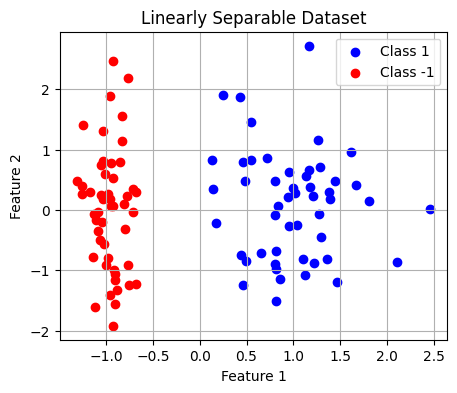

In [7]:
# Plot the dataset
plt.figure(figsize=(5, 4))

#you can plot the examples and have different colors for the different classes using plt.scatter() like the examples in the lecture
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue', label='Class 1')
plt.scatter(X[y == -1, 0], X[y == -1, 1], c='red', label='Class -1')

plt.title('Linearly Separable Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

The plot above shows our problem in a two-dimensional space (our feature space is 2D), but our actual problem exists in three dimensions. We have two features describing each example and a third feature that represents the label of the instances. Let's visualize it in 3D. Rotate the picture to see better that all examples of the blue class are positioned at one and all examples of the red class are positioned at zero.

Note: to be able to rotate the 3D visualisation, you will need to install the package *ipympl*. You can it by typing inside your environment:

*conda install -c conda-forge ipyml*

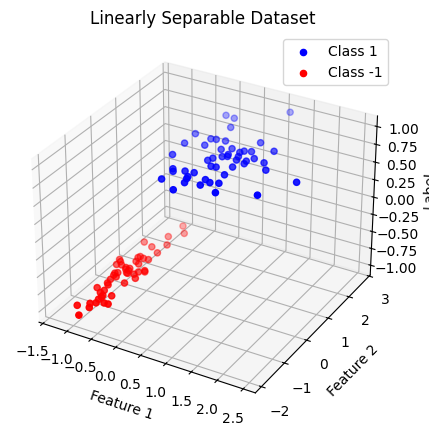

In [8]:
# Plot the dataset in 3D
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[y == 1, 0], X[y == 1, 1], y[y == 1], c='blue', label='Class 1')
ax.scatter(X[y == -1, 0], X[y == -1, 1], y[y == -1], c='red', label='Class -1')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Label')
plt.title('Linearly Separable Dataset')
plt.legend()

# Enable interactive mode for rotation
plt.ion()
plt.show()

### Initialising our model and training it

In [11]:
simple_model = Simple_Model(num_features=2)

#call the train function
#...
simple_model.train(X, y)

### Plotting the decision boundary

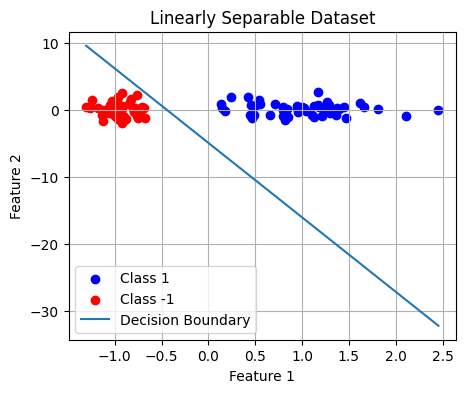

In [12]:
#simple_model.weights will have the weights in norm vector. This is of the form [w0,w1,w2], w0 is bias parameter.
weights = weights = simple_model.weights[1:]  # First element is bias, rest are weights
bias = simple_model.weights[0]

plot_decision_boundary(weights, bias, X, y)